In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#download data

In [3]:
# Sample data - Replace with actual high/low data
data_length = 300  # example length of data
high = pd.Series(100 + 10 * np.sin(i / 20) + np.random.randn() for i in range(data_length))
low = high - 5 + np.random.randn(data_length)

In [4]:
# Configuration parameters
length = 10
max_risk_per_reward = 30
show_zigzag = False
show_pivots = True
display_risk_per_reward = True
bullish_color = 'green'
bearish_color = 'red'

In [5]:
# Calculate pivot highs/lows
def pivots(high, low, length):
    ph = high[(high.rolling(window=length, center=True).apply(lambda x: x.argmax() == (length // 2), raw=True))]  # pivot high
    pl = low[(low.rolling(window=length, center=True).apply(lambda x: x.argmin() == (length // 2), raw=True))]    # pivot low
    return ph, pl

In [6]:
# Detect double top/bottom patterns
def detect_double_top_bottom(zigzag_values, zigzag_indexes, zigzag_dir, max_risk_per_reward):
    double_top, double_bottom = False, False
    risk_per_reward = 0

    if len(zigzag_values) >= 4:
        value, lvalue, llvalue = zigzag_values[1:4]
        high_low, lhigh_low, llhigh_low = zigzag_dir[1:4]

        # Risk-reward calculation
        risk = abs(value - llvalue)
        reward = abs(value - lvalue)
        risk_per_reward = risk * 100 / (risk + reward)

        # Check conditions for double top/bottom
        if high_low == 1 and llhigh_low == 2 and lhigh_low < 0 and risk_per_reward < max_risk_per_reward:
            double_top = True
        elif high_low == -1 and llhigh_low == -2 and lhigh_low > 0 and risk_per_reward < max_risk_per_reward:
            double_bottom = True

    return double_top, double_bottom, risk_per_reward

In [7]:
# Generate a zigzag pattern for demo purposes
def generate_zigzag(high, low, length):
    zigzag_values, zigzag_indexes, zigzag_dir = [], [], []
    ph, pl = pivots(high, low, length)
    for i, (h, l) in enumerate(zip(ph.dropna().index, pl.dropna().index)):
        # Simplified logic to append detected pivots to zigzag lists
        if i % 2 == 0:
            zigzag_values.append(high[h])
            zigzag_indexes.append(h)
            zigzag_dir.append(1)  # uptrend
        else:
            zigzag_values.append(low[l])
            zigzag_indexes.append(l)
            zigzag_dir.append(-1)  # downtrend
    return zigzag_values, zigzag_indexes, zigzag_dir

In [11]:
# Process data and detect patterns
zigzag_values, zigzag_indexes, zigzag_dir = generate_zigzag(high, low, length)
double_top, double_bottom, risk_per_reward = detect_double_top_bottom(zigzag_values, zigzag_indexes, zigzag_dir, max_risk_per_reward)

KeyError: '[nan] not in index'

NameError: name 'double_top' is not defined

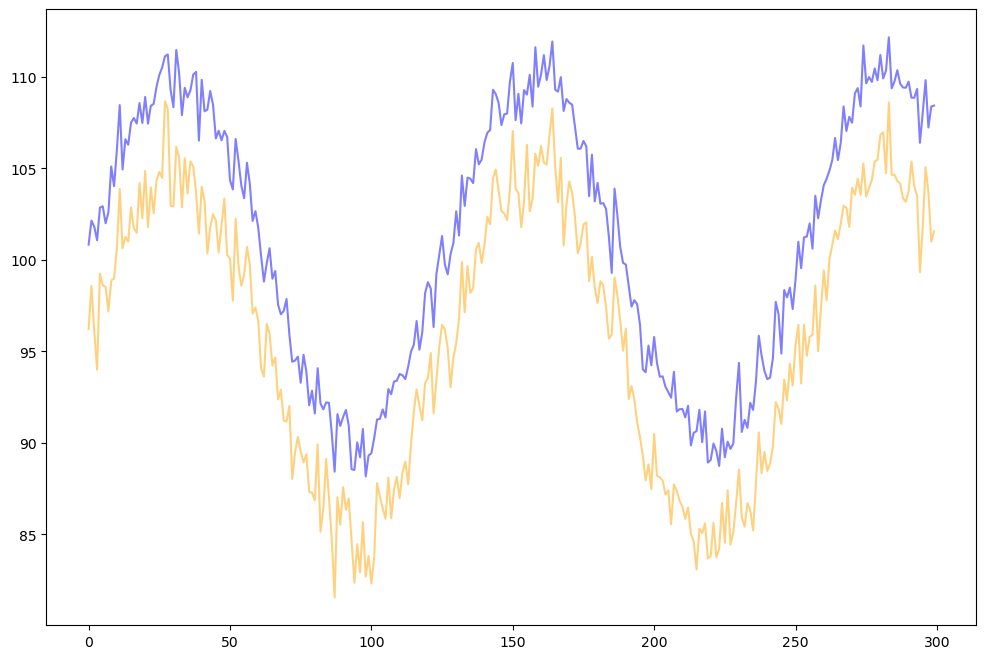

In [12]:
# Display results
plt.figure(figsize=(12, 8))
plt.plot(high, label='High', color='blue', alpha=0.5)
plt.plot(low, label='Low', color='orange', alpha=0.5)

# Plot detected patterns
if double_top or double_bottom:
    pattern_type = "Double Top" if double_top else "Double Bottom"
    plt.title(f"{pattern_type} Detected with Risk/Reward: {risk_per_reward:.2f}%")

# Plot zigzag lines (if enabled)
if show_zigzag:
    for i in range(1, len(zigzag_indexes)):
        plt.plot([zigzag_indexes[i-1], zigzag_indexes[i]], [zigzag_values[i-1], zigzag_values[i]], color='purple', linestyle='--')

plt.legend()
plt.show()

# Print confirmation
if double_top:
    print("Double Top detected.")
elif double_bottom:
    print("Double Bottom detected.")
else:
    print("No significant double top/bottom pattern detected.")